# Welcome.

This file contains the code which stores the data collected during the environmental survey, and the code which creates the interactive maps. I've included step-by-step descriptions and explanations, so that an unfamiliar user may follow along. This code is easily adaptable, and there are many areas where it may be expanded upon, or improved.

To just view the maps, scroll to the bottom of this document.


Best of luck,

Clara + River Foss Group 2

In [2]:
##import packages
import numpy as np
from scipy.io import netcdf
import pandas as pd
import xarray as xr
#import netCDF4
import folium
from colour import Color
from folium import GeoJson
import matplotlib.pyplot as plt
from folium import IFrame
from IPython.display import display

The following cell is used to input the data collected using the tally charts. To add data, refer to the following:


Step by Step Instructions:

name_walk_# = np.array([[region A], [region B], [region C], [region D], [region F], [region G], [region H], [region I], [region J],
[region K], [region L], [region M]]);

*Depending on whether the data collected is describing litter in the water or on the bank, adding an additional signifier to the label name_walk_# is useful (I use _water).

*Remember that we omit region E because the river was not visible from the path during the majority of that region. Thus, instead of inputting null values, we simply omit it entirely.

In [3]:
##the data from the walks

##Walk 1
##regions A to I
clara_walk_1 = np.array([[16,0,6,2,0,21,2,0],[15,1,18,0,1,50,4,2],[2,0,3,1,1,15,1,0],
                         [4,1,1,0,1,6,0,0],[0,0,4,2,0,3,0,1],[0,1,4,0,0,4,1,1],[4,0,31,0,0,15,0,1],
                         [1,0,5,1,0,6,0,3]]);

phoebe_walk_1 = np.array([[17, 0, 7, 3, 0, 11, 1, 0],[24, 2, 30, 1, 1, 21, 0, 1], [3, 0, 2, 0, 1, 6, 2, 0],
                          [4, 2, 1, 0, 1, 3, 0, 1],[0, 0, 4, 1 ,0, 1, 0, 1],[0, 1, 3, 2, 0, 2, 2, 1],
                          [3, 0, 20, 0, 0, 3, 0, 2],[2, 0, 3, 0, 0, 0, 0, 3]]);

connor_walk_1 = np.array([[5, 0, 6, 2, 1, 6, 2, 0],[6, 1, 15, 0, 1, 4, 0, 1],[1, 0, 2, 0, 1, 1, 0, 0],
                          [1, 1, 1, 0, 1, 3, 0, 1],[1, 0, 6, 1, 0, 2, 1, 2],[1, 0, 2, 0, 0, 2, 0, 0],
                          [1, 0, 13, 0, 0, 1, 2, 3],[0, 0, 2, 0, 0, 0, 3, 4]]);

anushtika_walk_1 = np.array([[8,1,6,2,0,34,4,0],[8,1,31,0,1,27,4,2],[1,0,2,1,1,2,1,0],
                             [5,1,1,3,1,4,0,0],
                             [0,0,3,2,0,3,0,1],[0,0,1,1,0,2,2,1],[9,0,20,0,0,1,0,1],
                             [0,0,5,0,0,0,3,2]]);




##Walk 2
##regions A to I

clara_walk_2 = np.array([[16, 1, 27, 7, 1, 36, 0, 0],[5,2,18,0,3,17,3,0],[3,1,2,0,0,21,0,0],
                         [4,0,9,3,0,11,0,0],[0,0,3,0,0,4,0,0],[2,0,13,0,0,7,0,0],[1,0,27,0,0,16,0,1],
                         [2,0,15,1,0,10,3,3]]);
connor_walk_2 = np.array([[1,0,12,0,1,11,2,0],[0,1,6,0,3,4,2,0],
                          [2,0,4,0,0,2,0,0],[1,0,0,3,0,1,0,0],[0,0,0,0,0,2,0,0],
                          [0,0,8,0,0,5,1,0],[0,0,10,0,0,2,0,0],[2,0,9,0,0,2,3,2]]);

#
anushtika_walk_2_water = np.array([[2,0,21,0,0,5,1,1],[2,0,17,0,0,5,1,3],[10,1,17,0,0,0,0,5],[0,0,6,0,0,1,2,0],
                                   [0,2,10,0,0,1,2,1],[0,1,2,0,0,0,0,1],[0,0,3,1,0,2,3,1],[0,1,2,0,0,1,3,8]]);
#




#Walk 3
##regions I to M
clara_walk_3_water = np.array([[1, 0, 1, 0, 0, 0, 0, 2],[0, 0, 0, 0, 0, 0, 1, 0],
                               [0, 0, 3, 2, 0, 0, 2, 2],[0, 0, 3, 0, 0, 0, 3, 1],
                               [0, 0, 12, 1, 0, 0, 3, 1]]);
kym_walk_3 = np.array([[14,3,16,1,0,28,3,5],[1,0,2,2,0,5,1,1],[7,0,6,11,0,15,5,2],
                       [8,0,22,4,1,41,12,2],[5,0,8,13,1,12,1,0]]);
anushtika_walk_3_water = np.array([[1,0,1,0,0,0,0,2],[0,0,0,0,0,1,0,0],
                                   [0,0,5,2,0,0,2,2,],
                                   [0,0,2,0,0,0,4,1],[0,0,12,1,0,2,2,1]]);
phoebe_walk_3 = np.array([[13,3,17,0,0,32,4,5],[1,0,1,3,0,5,2,1],
                          [7,0,12,10,0,16,5,1],[8,0,23,4,1,41,14,2],[7,0,10,16,1,15,1,0]]);






###walk4
##regions I to M

phoebe_walk_4 = np.array([[11,1,9,2,0,16,2,3],[0,1,5,2,0,8,1,1],
                          [4,0,7,7,0,12,4,2],[11,0,22,2,3,16,9,1],[6,0,12,14,0,5,3,0]]);
anushtika_walk_4_water = np.array([[0,0,4,0,1,0,3,2],[0,0,0,0,0,0,1,2],[0,0,4,2,0,1,0,2],
                                   [0,1,0,0,0,2,1,1],[0,0,10,0,0,2,1,0]]);





##walk5
##regions A to I
anushtika_walk_5_water = np.array([[1,0,30,0,0,6,6,5],[13,1,85,0,0,5,5,4],[10,0,12,0,0,5,2,0],[1,0,12,0,0,4,3,1],
                                   [1,0,28,1,0,1,1,0],[4,0,12,0,2,2,3,2],[0,0,23,1,0,3,2,8],[0,0,0,0,0,0,0,3]]);

clara_walk_5_water = np.array([[3,0,21,0,0,4,3,4],[11,1,84,0,0,12,2,2],[4,0,20,0,0,8,2,0],
                               [1,0,12,0,0,3,1,1],[1,0,31,1,0,3,1,0],[4,0,20,0,1,3,3,2],[0,0,22,1,0,3,1,8],[0,0,0,0,0,0,0,3]]);





Now put all the data you have collected into one data frame. We specify the categories, the region, the data-collector, and then add the dimension of time by specifying which walk.

*I break the data into two dataframes, one for river bank data, and another for river water data




Step by Step Instructions:

*To add data, define a dataset per walk. This dataset will have coordinates of category and region (since we split our total region into two data collection distances, I define two arrays, regions_first and regions_second), and will include the data collected by each individual:

walk_#_ds = xr.Dataset({ "Person_Name": (("Category", "Region"), person_data_array_defined_above) }, coords = {"Category":categories, "Region": region});

*Convert to a dataframe for easy data analysis and to be able to display as an easily-readable chart
df_walk_# = walk_#_ds.to_dataframe();

*Put all the walks data together with dimension of walk number, alternatively could make this dimension time.
df_walk_#['Walk'] = 'walk #';
df_combined = pd.concat([df_walk_#];
df_combined.reset_index(inplace=True);
df_combined.set_index(['Category', 'Region', 'Walk'], inplace=True);

In [4]:
##defining coordinates for the dataframe
categories = ["Food Packaging", "Food", "Drinks Packaging", "Dog Waste Bags", "Clothing", "Misc. Small", "Misc. Medium", "Misc. Large"];
regions_first = ["A", "B", "C", "D", "F", "G", "H", "I"];
regions_second = ["I", "J", "K", "L", "M"];



##START WITH THE DATA FOR LITTER ON THE RIVER BANK

##creating the datasets
walk_1_ds = xr.Dataset(
    {
        "Clara": (("Category", "Region"), clara_walk_1),
        "Connor": (("Category", "Region"), connor_walk_1),
        "Phoebe": (("Category", "Region"), phoebe_walk_1),
        "Anushtika": (("Category", "Region"), anushtika_walk_1),
    },
    coords={
        "Category": categories,
        "Region": regions_first
    }
);

walk_2_ds = xr.Dataset(
    {
        "Clara": (("Category", "Region"), clara_walk_2),
        "Connor": (("Category", "Region"), connor_walk_2),

    },
    coords={
        "Category": categories,
        "Region": regions_first
    }
);


walk_3_ds = xr.Dataset(
    {
        "Kym": (("Category", "Region"), kym_walk_3.T),
        "Phoebe": (("Category", "Region"), phoebe_walk_3.T),
    },
    coords={
        "Category": categories,
        "Region": regions_second
    }
);


walk_4_ds = xr.Dataset(
    {
        "Phoebe": (("Category", "Region"), phoebe_walk_4.T),
    },
    coords={
        "Category": categories,
        "Region": regions_second
    }
);



##convert to dataframes
df_walk_1 = walk_1_ds.to_dataframe();
df_walk_2 = walk_2_ds.to_dataframe();
df_walk_3 = walk_3_ds.to_dataframe();
df_walk_4 = walk_4_ds.to_dataframe();




#DATA FOR LITTER DATA FOR THE RIVER WATER

water_walk_2 = xr.Dataset(
    {
        "Anushtika": (("Category", "Region"), anushtika_walk_2_water)
    },
    coords = {"Category": categories,
              "Region": regions_first
             }
);


water_walk_3 = xr.Dataset(
    {
        "Anushtika": (("Category", "Region"), anushtika_walk_3_water.T),
        "Clara": (("Category", "Region"), clara_walk_3_water.T),
    },
    coords = {"Category": categories,
              "Region": regions_second
             }
);


water_walk_4 = xr.Dataset(
    {
        "Anushtika": (("Category", "Region"), anushtika_walk_4_water.T),

    },
    coords = {"Category": categories,
              "Region": regions_second
             }
);


water_walk_5 = xr.Dataset(
    {
        "Anushtika": (("Category", "Region"), anushtika_walk_5_water.T),
        "Clara": (("Category", "Region"), clara_walk_5_water.T)

    },
    coords = {"Category": categories,
              "Region": regions_first
             }
);



#turn into dataframes
water_walk_2_df = water_walk_2.to_dataframe();
water_walk_3_df = water_walk_3.to_dataframe();
water_walk_4_df = water_walk_4.to_dataframe();
water_walk_5_df = water_walk_5.to_dataframe();







###Now put the 3D dataframes for each walk's data into a 4D dataframe




##Litter Data on Banks+Path
#adding dimension of which walk
df_walk_1['Walk'] = 'walk #1'
df_walk_2['Walk'] = 'walk #2'
df_walk_3['Walk'] = 'walk #3'
df_walk_4['Walk'] = 'walk #4'
##combining
df_combined = pd.concat([df_walk_1, df_walk_2, df_walk_3, df_walk_4])
df_combined.reset_index(inplace=True)
df_combined.set_index(['Category', 'Region', 'Walk'], inplace=True)
#display (check for errors)
print("Litter Data on the Banks+Path")
print(df_combined)




##Litter Data on Water Surface
#adding dimension of which walk
water_walk_2_df['Walk'] = 'walk #2'
water_walk_3_df['Walk'] = 'walk #3'
water_walk_4_df['Walk'] = 'walk #4'
water_walk_5_df['Walk'] = 'walk #5'
#combining
df_water_comb = pd.concat([water_walk_2_df, water_walk_3_df, water_walk_4_df, water_walk_5_df])
df_water_comb.reset_index(inplace=True)
df_water_comb.set_index(['Category', 'Region', 'Walk'], inplace=True)
#display
print("Litter Data on the Water")
print(df_water_comb)


Litter Data on the Banks+Path
                               Clara  Connor  Phoebe  Anushtika  Kym
Category       Region Walk                                          
Food Packaging A      walk #1   16.0     5.0    17.0        8.0  NaN
               B      walk #1    0.0     0.0     0.0        1.0  NaN
               C      walk #1    6.0     6.0     7.0        6.0  NaN
               D      walk #1    2.0     2.0     3.0        2.0  NaN
               F      walk #1    0.0     1.0     0.0        0.0  NaN
...                              ...     ...     ...        ...  ...
Misc. Large    I      walk #4    NaN     NaN     3.0        NaN  NaN
               J      walk #4    NaN     NaN     1.0        NaN  NaN
               K      walk #4    NaN     NaN     2.0        NaN  NaN
               L      walk #4    NaN     NaN     1.0        NaN  NaN
               M      walk #4    NaN     NaN     0.0        NaN  NaN

[208 rows x 5 columns]
Litter Data on the Water
                        

I compute the averages over each person's data per category per region manually, but it is simple enough to do by writing some lines of code using the dataframe.

In [5]:
###manually computing the means

#for the river bank data first
walk_1_bank_mean = (clara_walk_1 + phoebe_walk_1 + anushtika_walk_1 + connor_walk_1)/4;

walk_2_bank_mean = (clara_walk_2 + connor_walk_2)/2;

walk_3_bank_mean = (kym_walk_3 + phoebe_walk_3)/2;

walk_4_bank_mean = (phoebe_walk_4);

start_region_mean = (walk_1_bank_mean + walk_2_bank_mean)/2;
end_region_mean = (walk_3_bank_mean + walk_4_bank_mean)/2;

bank_mean = np.zeros((12,8))



###now to join the two Region I values in start region and end region, since they overlap
for i in range(0,7):
    bank_mean[i] = start_region_mean[i];

bank_mean[7] = (start_region_mean[7] + end_region_mean[0]);

for j in range(1,5):
    bank_mean[j+7] = end_region_mean[j];

print(bank_mean)


#coordinates
categories = ["Food Packaging", "Food", "Drinks Packaging", "Dog Waste Bags", "Clothing", "Misc. Small", "Misc. Medium", "Misc. Large"];
regions = ["A", "B", "C", "D", "F", "G", "H", "I","J", "K", "L", "M"];

#compile into a dataset
bank_mean_ds = xr.Dataset( {"Average": (("Region", "Category"), bank_mean) }, coords={
        "Category": categories,
        "Region": regions
    }
                         );
#convert to dataframe
bank_mean_df = bank_mean_ds.to_dataframe();
#display
print(bank_mean_df)






###now the same but for the water

walk_2_water_mean = anushtika_walk_2_water;

walk_3_water_mean = (clara_walk_3_water + anushtika_walk_3_water)/2;

walk_4_water_mean = anushtika_walk_4_water;

walk_5_water_mean = (clara_walk_5_water + anushtika_walk_5_water)/2;
#

start_region_mean_water = (walk_2_water_mean + walk_5_water_mean)/2
end_region_mean_water = (walk_3_water_mean + walk_4_water_mean)/2;

water_mean = np.zeros((12,8))

###now to join the two I values in start region and end region
for i in range(0,7):
    water_mean[i] = start_region_mean_water[i];

water_mean[7] = (start_region_mean_water[7] + end_region_mean_water[0]);

for j in range(1,5):
    water_mean[j+7] = end_region_mean_water[j];

print(water_mean)


#compile into a dataset
water_mean_ds = xr.Dataset( {"Average": (("Region", "Category"), water_mean) }, coords={
        "Category": categories,
        "Region": regions
    }
                         );
#convert to dataframe
water_mean_df = water_mean_ds.to_dataframe();
#display
print(water_mean_df)






###now, to compute the average litter over all the categories for a specific region, the following code is used:

##take the full mean for the river bank data
full_mean = np.zeros(12)

for i in range(0,12):
    full_mean[i] = bank_mean_df.loc[regions[i]].sum()

avg_whole = [regions, full_mean]


##take the full mean for the river water data
full_mean_water = np.zeros(12)

for i in range(0,12):
    full_mean_water[i] = water_mean_df.loc[regions[i]].sum()

avg_water = [regions, full_mean_water]

[[10.     0.375 12.875  2.875  0.625 20.75   1.625  0.   ]
 [ 7.875  1.375 17.75   0.125  2.    18.     2.25   0.75 ]
 [ 2.125  0.25   2.625  0.25   0.5    8.75   0.5    0.   ]
 [ 3.     0.625  2.75   1.875  0.5    5.     0.     0.25 ]
 [ 0.125  0.     2.875  0.75   0.     2.625  0.125  0.625]
 [ 0.625  0.25   6.5    0.375  0.     4.25   0.875  0.375]
 [ 2.375  0.    19.75   0.     0.     7.     0.25   1.125]
 [13.625  2.    20.625  1.625  0.    26.75   5.     6.75 ]
 [ 0.5    0.5    3.25   2.25   0.     6.5    1.25   1.   ]
 [ 5.5    0.     8.     8.75   0.    13.75   4.5    1.75 ]
 [ 9.5    0.    22.25   3.     2.    28.5   11.     1.5  ]
 [ 6.     0.    10.5   14.25   0.5    9.25   2.     0.   ]]
                         Average
Region Category                 
A      Food Packaging     10.000
       Food                0.375
       Drinks Packaging   12.875
       Dog Waste Bags      2.875
       Clothing            0.625
...                          ...
M      Dog Waste Bags     1

<ipython-input-5-a4cd62dcf56b>:101: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  full_mean[i] = bank_mean_df.loc[regions[i]].sum()
<ipython-input-5-a4cd62dcf56b>:110: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  full_mean_water[i] = water_mean_df.loc[regions[i]].sum()


To export your data as a data table, uncomment the following lines of code to export as a .csv file to your current working directory.

*To check your current working directory, open the terminal and type in 'pwd'. To change your working directory, use 'cd /Users/File Path' and write your preferred file path

In [6]:
#export mean data to csv
#dataframe.to_csv('~/title.csv',index = True)

Now we've written all of our data into dataframes, and it's time to display them on maps.

The following cell simply defines the coordinates (latitude, longitude) of the rubbish bins and the start coordinates of each of the 0.5 mile regions.

In [7]:
##make a matrix of the what3words locations for the bins

bins_loc = [[53.956784, -1.079006],[53.957080, -1.078869],[53.965300, -1.072768],[53.973116, -1.071897],
            [53.974545, -1.073639],[53.985729, -1.071805],[53.987616, -1.071118],[53.988478, -1.070109],
            [53.990742, -1.070384],[53.991928, -1.068184],[53.992925, -1.067313],[ 53.997857, -1.061583],
            [54.007587, -1.060366]];

#print(bins_loc);



##make a matrix of the what3words locations of the start points of the regions
regions_loc = [[53.951582, -1.078274],[53.957080, -1.078869],[53.959910, -1.072263],[53.965300, -1.072768],
               [53.971661, -1.072722],[53.974545, -1.073639],[53.976943, -1.073547],[53.982333, -1.068963],
               [53.987616, -1.071118],[53.993383, -1.067359],[53.996860, -1.061996],[54.003086, -1.062661],[54.007560, -1.060550],[54.014352, -1.061559]];
#print(regions_loc);

Since we want to display the data on the map using a traffic-color-gradient, i.e. red:most litter :: green:least litter, we need to specify a color scale.


*This code is somewhat difficult, so only modify if you are familiar with this type of code

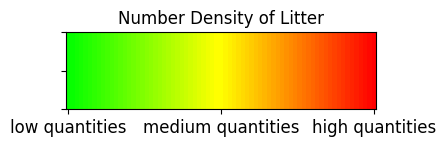

In [8]:
#Defining the color scale

# Define your existing code for color interpolation and conversion to hex
def interpolate_color(start, end, steps):
    return [
        (
            int(start[0] + (end[0] - start[0]) * i / (steps - 1)),
            int(start[1] + (end[1] - start[1]) * i / (steps - 1)),
            int(start[2] + (end[2] - start[2]) * i / (steps - 1))
        )
        for i in range(steps)
    ]

def rgb_to_hex(rgb):
    # Convert to string identifier
    return f"#{rgb[0]:02x}{rgb[1]:02x}{rgb[2]:02x}"

# Define color ranges for the gradient transitions (reversed order)
green = (0, 255, 0)
yellow = (255, 255, 0)
red = (255, 0, 0)

# Create the gradient in two parts: green -> yellow, yellow -> red
colors_green_to_yellow = interpolate_color(green, yellow, 35)  # 35 steps from green to yellow
colors_yellow_to_red = interpolate_color(yellow, red, 36)  # 36 steps from yellow to red

# Combine the two color ranges
colors = colors_green_to_yellow + colors_yellow_to_red

# Convert RGB tuples to hex strings
hex_colors = [rgb_to_hex(color) for color in colors]




#Defining the color bar to show the scale

# Create a numpy array for the color bar
n_colors = len(hex_colors)
gradient = np.linspace(0, 1, n_colors).reshape(1, -1)

# Plot the gradient as a color bar
fig, ax = plt.subplots(figsize=(4, 1))  # Set the size of the color bar
ax.imshow(gradient, aspect='auto', cmap=plt.cm.colors.ListedColormap(hex_colors))
ax.set_yticklabels([])

# Add custom labels ('high quantities', 'medium quantities', 'low quantities')
ax.set_xticks([0, n_colors // 2, n_colors - 1])  # Set tick positions
ax.set_xticklabels(['low quantities', 'medium quantities', 'high quantities'], fontsize=12)  # Set tick labels
ax.set_title("Number Density of Litter")

# Name the plot to call later
colorbar = fig;



Now that we have a color scale, we assign each of the data points in the averaged data frame a color corresponding to relative litter amounts in that region. This is the database we will use to plot on the map.


*This is using the separately defined averaged data dataframe defined a few cells previously. But, this code can be adapted to work for any similar array, or on the total data dataframes themselves with a few adjustments

In [9]:
##assigning data point (~region) their traffic light value
#river bank data
list_cols = [];
for koolaid in range(0,12):
    num = int(full_mean[koolaid]) -7;
    cocomellon = hex_colors[num];
    list_cols = np.append(list_cols, cocomellon);
avg_whole = [regions, full_mean, list_cols];

##water data
cols_water = [];
for cabbage in range(0,12):
    num = int(full_mean_water[cabbage])-2 ;
    coconut = hex_colors[num];
    cols_water = np.append(cols_water, coconut);

avg_water = [regions, full_mean_water, cols_water];


We can start by generating a map without any incorporated litter data, but that shows the outline of the river we are concerned with.

In [10]:
##initialise map
basemap = folium.Map(location=[53.99,-1.078], zoom_start=12., width = 500, height = 500)

#add the coordinate data which 'draws' the river outline onto the map
geo_json_data = {"type":"Feature","properties":{},"geometry":{"type":"LineString",
                                                              "coordinates":
                                                              [[-1.078323,53.951572],[-1.078328,53.952048],[-1.078441,53.952446],[-1.078543,53.953093],[-1.078559,53.953617],[-1.078044,53.953813],[-1.07783,53.954608],[-1.077669,53.955195],
                                                               [-1.077722,53.955555],[-1.078194,53.956067],[-1.078817,53.956628],[-1.078827,53.957045],[-1.07828,53.957613],[-1.077583,53.957923],[-1.076446,53.957979],[-1.074611,53.958219],
                                                               [-1.073484,53.958535],[-1.072572,53.958958],[-1.07209,53.95933],[-1.072304,53.959709],[-1.072991,53.960309],[-1.073495,53.960782],[-1.073956,53.961148],[-1.074343,53.96159],
                                                               [-1.074343,53.96212],[-1.074042,53.962512],[-1.072991,53.963143],[-1.072283,53.963711],[-1.07239,53.964052],[-1.072862,53.964342],[-1.073313,53.964759],[-1.073377,53.965364],
                                                               [-1.073291,53.96592],[-1.072927,53.966273],[-1.072197,53.966488],[-1.071618,53.966829],[-1.071103,53.967157],[-1.070631,53.967523],[-1.070845,53.967813],[-1.071403,53.968028],
                                                               [-1.071982,53.968381],[-1.072519,53.96876],[-1.072884,53.969113],[-1.072969,53.969681],[-1.073141,53.970287],[-1.073248,53.97083],[-1.073248,53.971221],[-1.07312,53.971789],
                                                               [-1.072862,53.972231],[-1.072583,53.97271],[-1.072369,53.973051],[-1.072369,53.973442],[-1.072261,53.973859],[-1.072583,53.9742],[-1.07312,53.974389],[-1.073806,53.974654],
                                                               [-1.074471,53.974982],[-1.075029,53.975588],[-1.074793,53.976042],[-1.074557,53.976307],[-1.073785,53.976724],[-1.072969,53.977203],[-1.072197,53.977582],[-1.071553,53.97796],
                                                               [-1.071339,53.978541],[-1.071167,53.979058],[-1.070888,53.979475],[-1.070459,53.979828],[-1.069837,53.980307],[-1.069279,53.980497],[-1.068699,53.980787],[-1.06827,53.981065],
                                                               [-1.067927,53.98138],[-1.067841,53.981784],[-1.067927,53.982099],[-1.06842,53.982326],[-1.069129,53.982389],[-1.069922,53.982415],[-1.070824,53.982528],[-1.071639,53.982692],
                                                               [-1.072154,53.98297],[-1.072733,53.983411],[-1.073098,53.983765],[-1.073034,53.983992],[-1.072733,53.984206],[-1.072176,53.984433],[-1.071703,53.984509],[-1.071382,53.984597]]}}
geo_json_data_2 = {"type":"Feature","properties":{},"geometry":{"type":"LineString",
                                                                "coordinates":[[-1.071382,53.984572],[-1.071081,53.984761],[-1.071575,53.984963],[-1.071897,53.98514],[-1.071854,53.985519],[-1.071746,53.985935],[-1.071596,53.986389],
                                                                                                   [-1.071446,53.987133],[-1.070867,53.987726],[-1.070459,53.988092],[-1.06988,53.98866],[-1.069729,53.989038],[-1.069558,53.989556],[-1.069965,53.989922],
                                                                                                   [-1.070502,53.990325],[-1.070352,53.990679],[-1.069794,53.991246],[-1.069129,53.991486],[-1.06827,53.99165],[-1.067777,53.992129],[-1.067176,53.992558],[-1.067176,53.993151],
                                                                                                   [-1.06709,53.993593],[-1.066275,53.993996],[-1.065459,53.993757],[-1.064451,53.993517],[-1.063485,53.993567],[-1.062391,53.993794],[-1.061704,53.993933]
                                                                                                   ,[-1.06091,53.994463],[-1.060417,53.994753],[-1.060374,53.994967],[-1.060417,53.995396],[-1.060717,53.995674],[-1.061211,53.996052],[-1.061575,53.996355],
                                                                                                   [-1.062047,53.996595],[-1.061811,53.997061],[-1.061382,53.997604],[-1.061447,53.997806],[-1.061854,53.998007],[-1.062434,53.998297],[-1.062541,53.998789],
                                                                                                   [-1.062562,53.999824],[-1.062756,54.000505],[-1.062434,54.000858],[-1.062219,54.0014],[-1.062305,54.002031],[-1.062455,54.002409],[-1.062455,54.002977],
                                                                                                   [-1.062455,54.00333],[-1.061661,54.003569],[-1.060975,54.003632],[-1.060181,54.004036],[-1.059494,54.004616],[-1.059322,54.005297],[-1.059988,54.005738],
                                                                                                   [-1.061318,54.006155],[-1.062155,54.006483],[-1.062155,54.006836],[-1.061919,54.007214],[-1.061103,54.007353],[-1.060524,54.007744],[-1.06046,54.008752],
                                                                                                   [-1.060503,54.009912],[-1.060588,54.010278],[-1.060889,54.010934],[-1.060846,54.011438],[-1.060374,54.01198],[-1.060073,54.012169],[-1.060245,54.012396],
                                                                                                   [-1.060503,54.013077],[-1.060867,54.013657],[-1.061532,54.014389]]}};


#adds the outline of the whole river
folium.GeoJson(geo_json_data).add_to(basemap)
folium.GeoJson(geo_json_data_2).add_to(basemap)

##show the map
basemap



Now we want to include data on our map. To avoid compiling errors, make sure to define any additions to the map with unused names. We start by outlining the subregions of the river, recreating its curvature using many short straight lines.

In [11]:
##define the regions
region_a = {"type":"Feature","properties":{},"geometry":{"type":"LineString",
                                                         "coordinates":[[-1.078302,53.951549],[-1.078404,53.952294],[-1.078463,53.952837],[-1.078575,53.953232],[-1.078489,53.95356],[-1.078135,53.953734],[-1.077964,53.953977],[-1.077889,53.954252],
                                                                        [-1.077808,53.954589],[-1.077706,53.954937],[-1.077706,53.955113],[-1.077792,53.955593],[-1.077953,53.955783],[-1.078248,53.956218],[-1.078554,53.956389],[-1.078779,53.956767],
                                                                        [-1.078795,53.957077]]},
             };

region_b = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.078779,53.957061],
                                                                                            [-1.078387,53.957474],[-1.078103,53.957702],[-1.07762,53.957882],[-1.077186,53.957919],[-1.076767,53.957957],[-1.076419,53.957957],
                                                                                            [-1.075802,53.957967],[-1.075228,53.95809],[-1.074772,53.958188],[-1.074021,53.958314],[-1.073517,53.958481],[-1.073077,53.958696],[-1.072508,53.958996],[-1.072197,53.959239],
                                                                                            [-1.072143,53.959504],[-1.072267,53.959709],[-1.072395,53.95987]]}}
;

region_c = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.072412,53.959892],[-1.073388,53.960694],[-1.074096,53.961306],[-1.074439,53.961615],[-1.074364,53.962139],[-1.073914,53.962575],[-1.073323,53.96296],[-1.072873,53.963168],[-1.072476,53.963484],[-1.072379,53.963736],[-1.072444,53.964121],[-1.072937,53.96438],[-1.073216,53.964733],[-1.073388,53.965289]]}};
region_d = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073377,53.96532],[-1.073345,53.965907],[-1.072884,53.966217],[-1.072133,53.966456],[-1.071532,53.966892],[-1.071006,53.967151],[-1.07062,53.967447],[-1.070845,53.967756],[-1.071435,53.96804],
                                                                                            [-1.072111,53.968375],[-1.072487,53.968672],[-1.072744,53.969113],[-1.07283,53.969524],[-1.072969,53.969782],
                                                                                            [-1.073205,53.970293],[-1.073238,53.970659],[-1.073238,53.971025],[-1.073227,53.971429],[-1.073087,53.971751]]}};
region_f = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073624,53.974585],[-1.074171,53.974786],[-1.074579,53.975152],[-1.074879,53.975487],[-1.074965,53.975872],[-1.074568,53.976276],[-1.073881,53.976635],[-1.073409,53.976907]]}};

region_g = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073409,53.976907],[-1.072594,53.97731],[-1.071789,53.977739],[-1.071435,53.978131],[-1.071242,53.978629],[-1.071103,53.979159],[-1.07091,53.979512],[-1.070405,53.979923],[-1.069772,53.980213],[-1.069236,53.980497],[-1.068667,53.980774],[-1.068184,53.981008],[-1.067884,53.981367],[-1.067766,53.981815],[-1.067884,53.982112],[-1.068152,53.982326],[-1.068935,53.982377]]}};

region_h = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.068925,53.982377],[-1.070352,53.982452],[-1.071156,53.982522],[-1.071628,53.982667],[-1.072143,53.982919],[-1.072465,53.983121],[-1.072701,53.983323],[-1.072894,53.983487],[-1.07298,53.98367],[-1.07298,53.983935],[-1.072851,53.984137],[-1.072272,53.984351],[-1.071446,53.984547],[-1.071156,53.984743],[-1.071392,53.984856],[-1.071703,53.984951],[-1.071875,53.985096],[-1.071918,53.985285],[-1.071757,53.985582],[-1.071628,53.986004],[-1.071628,53.986301],[-1.071564,53.986566],[-1.071543,53.986793],[-1.071457,53.987115],[-1.071317,53.987329],[-1.071092,53.9876]]}};

region_i = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.071038,53.987644],[-1.070491,53.988212],[-1.069987,53.988597],[-1.069697,53.988931],[-1.069547,53.989303],[-1.069665,53.989581],[-1.070158,53.989985],[-1.07047,53.9903],[-1.07047,53.990521],[-1.070148,53.99095],[-1.069568,53.991196],[-1.06886,53.991435],[-1.068206,53.991738],[-1.067648,53.99211],[-1.067122,53.992539],[-1.067015,53.992962],[-1.067101,53.993422]]}};

region_j = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.06709,53.993441],[-1.066918,53.993719],[-1.066672,53.99387],[-1.06635,53.993958],[-1.065985,53.993921],[-1.06562,53.993807],[-1.065212,53.993687],[-1.064633,53.993611],[-1.064129,53.993561],[-1.063528,53.993611],[-1.062766,53.993712],[-1.062187,53.99382],[-1.061736,53.993921],[-1.061275,53.994154],[-1.060792,53.994463],[-1.060374,53.994728],[-1.060116,53.994904],[-1.060191,53.995163],[-1.060438,53.995359],[-1.060739,53.99568],[-1.061039,53.996021],[-1.061275,53.996235],[-1.061586,53.996393],[-1.06194,53.996544],[-1.062005,53.996645],[-1.061779,53.996897]]}};

region_k = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.061844,53.996847],[-1.061554,53.997263],[-1.061329,53.997421],[-1.061232,53.99766],[-1.061414,53.997831],[-1.061865,53.998039],[-1.062391,53.998241],[-1.062584,53.998379],[-1.062616,53.998562],[-1.06253,53.998827],[-1.062541,53.999054],[-1.062552,53.999344],[-1.062552,53.999603],[-1.062648,54.000019],[-1.062713,54.000227],[-1.062573,54.000549],[-1.062305,54.000852],[-1.062144,54.001198],[-1.062133,54.001608],[-1.062316,54.001905],[-1.06253,54.002302],[-1.062616,54.002605],[-1.062616,54.00309]]}};

region_l = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.062605,54.003071],[-1.062359,54.003424],[-1.061919,54.003519],[-1.061447,54.003595],[-1.060921,54.003733],[-1.060513,54.00391],[-1.059966,54.004074],[-1.059676,54.004313],[-1.059494,54.004654],[-1.05929,54.005007],[-1.059237,54.005266],[-1.059505,54.005486],[-1.059891,54.005669],[-1.060363,54.00589],[-1.061028,54.006073],[-1.06164,54.006281],[-1.062144,54.006464],[-1.062251,54.00676],[-1.062112,54.007025],[-1.061929,54.00717],[-1.0615,54.007245],[-1.060985,54.007359],[-1.060717,54.007485],[-1.060599,54.007605]]}};

region_m = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.06061,54.007567],[-1.06046,54.007933],[-1.060395,54.008324],[-1.060427,54.008721],[-1.060503,54.009257],[-1.060503,54.009824],[-1.060631,54.010202],[-1.060846,54.010631],[-1.060921,54.011022],[-1.060878,54.011381],[-1.060728,54.011615],[-1.060438,54.011842],[-1.060073,54.01205],[-1.06003,54.012188],[-1.060191,54.012321],[-1.060395,54.012459],[-1.060427,54.012831],[-1.060503,54.013191],[-1.060674,54.013506],[-1.060889,54.013771],[-1.061146,54.014036],[-1.061382,54.014275],[-1.061511,54.014389]]}};


The following produces an interactive map using the averaged river bank data.


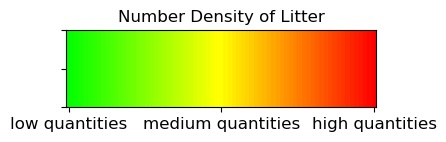

In [76]:


##the following packages are unnecessary, but were part of additional code I tried to develop
import os
from IPython.display import display, HTML, Image

##now the code for the interactive map
# Initialize the map
bank_map = folium.Map(location=[54,-1.074], zoom_start=12., width=500, height=500)



# Markers for the start and finish of the observed region
marker = folium.Marker([53.951582, -1.078386], popup='Start').add_to(bank_map)
marker = folium.Marker([54.014362, -1.061606], popup='End').add_to(bank_map)



# Initialize the legend
lgd_txt = '<span style="color: {col};">{txt}</span>'


# Define a style function that takes color as a parameter
def style_function(x, color):
    return {'fillColor': color, 'color': color}



# Add the regions with popups and images
#unused code
regions = [
    {"region": region_a, "name": "Region A", "color": list_cols[0], "image": "region_a_pie.png"},
    {"region": region_b, "name": "Region B", "color": list_cols[1], "image": "region_b_pie.png"},
    {"region": region_c, "name": "Region C", "color": list_cols[2], "image": "region_c_pie.png"},
    {"region": region_d, "name": "Region D", "color": list_cols[3], "image": "region_d_pie.png"},
    {"region": region_f, "name": "Region F", "color": list_cols[4], "image": "region_f_pie.png"},
    {"region": region_g, "name": "Region G", "color": list_cols[5], "image": "region_g_pie.png"},
    {"region": region_h, "name": "Region H", "color": list_cols[6], "image": "region_h_pie.png"},
    {"region": region_i, "name": "Region I", "color": list_cols[7], "image": "region_i_pie.png"},
    {"region": region_j, "name": "Region J", "color": list_cols[8], "image": "region_j_pie.png"},
    {"region": region_k, "name": "Region K", "color": list_cols[9], "image": "region_k_pie.png"},
    {"region": region_l, "name": "Region L", "color": list_cols[10], "image": "region_l_pie.png"},
    {"region": region_m, "name": "Region M", "color": list_cols[11], "image": "region_m_pie.png"},
]




# Loop through the regions and add each to the map with a popup
for region in regions:
    region_geojson = region["region"]
    name = region["name"]
    color = region["color"]
    image_url = region["image"]



    ##this is a section where I tried to include the pie charts as popups for the regions, but I could not get it to work.
    # HTML string for the popup, including an image

    #popup_html = f"""
    #<!DOCTYPE html>
    #<html lang="en">
    #<body>
    #    <img src="{image_url}" style="max-width: 100%; height: auto;">
    #</body>
    #</html>
    #"""

    # Add the region as a GeoJson layer with the popup (excluding the popup code, because I could not fix it in time)
    folium.GeoJson(
        region_geojson,
        name=lgd_txt.format(txt=name, col=color),
        style_function=lambda x, color=color: style_function(x, color),  # Passing color as a parameter
        #popup=folium.Popup(popup_html, max_width=300)  # Add popup with image
    ).add_to(bank_map)



# Add region E after the fact because it's special (no data for this region), so need to have its own style, folium.GeoJson add to legend, etc.
region_e = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073012,53.971789],[-1.072712,53.972426],[-1.07239,53.972818],[-1.072369,53.973247],[-1.072326,53.973625],[-1.072326,53.974023],[-1.072583,53.974219],[-1.073624,53.974547]]}}
stylee = {'fillColor': '#727675', 'color': '#727675'}
folium.GeoJson(region_e, name=lgd_txt.format(txt='Region E', col='#727675'), style_function=lambda x: stylee).add_to(bank_map)






##Add the color bar
import gdown

# I saved the jpg of the colorbar in my local directory, shared it publically, then downloaded it again to be able to load it in this code. Uncomment to
#download it, then recomment to prevent error messages

#file_id = '1sTdweZKy2-kLjF41Lw1fHJ8in_ve9BuM'
# Download the file to the current working directory
#gdown.download(f'https://drive.google.com/uc?id={file_id}', 'colorscale.jpg', quiet=False)

# Now, use the downloaded image path in the folium overlay
image_url = 'colorscale.jpg'  # The local path to the image

# The `bounds` will be based on the center coordinates and fixed size
image_width = 0.125
image_height = 0.025

# Define the center of the image (in geographic coordinates)
center_lat = 54.035
center_lon = -1.061606

# Calculate the bounds based on the fixed size and the center coordinates
southwest = [center_lat - image_height / 2, center_lon - image_width / 2]
northeast = [center_lat + image_height / 2, center_lon + image_width / 2]

image_bounds = [southwest, northeast]

#add colorbar figure
folium.raster_layers.ImageOverlay(
    image_url,
    name="Colour Scale",
    bounds=image_bounds,
    opacity=1,
    interactive = True,
    zIndex = 100,
    overlay=True
).add_to(bank_map)






# Add Layer Control
folium.LayerControl().add_to(bank_map)

# Show map
from IPython.display import display
display(bank_map)



The following produces an interactive map built using the averaged river water data.


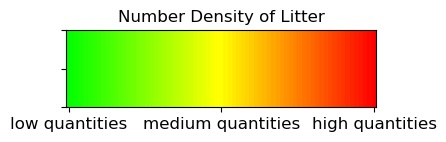

In [74]:
#####interactive mean river WATER data map

##initialise map
water_map = folium.Map(location=[54,-1.074], zoom_start=12., width = 500, height = 500)


###start and finish markers
marker = folium.Marker([53.951582,-1.078386], popup='Start').add_to(water_map)
marker = folium.Marker([54.014362,-1.061606], popup='End').add_to(water_map)

#initialise the legend
lgd_txt = '<span style="color: {col};">{txt}</span>'

##define the regions
region_a = {"type":"Feature","properties":{},"geometry":{"type":"LineString",
                                                         "coordinates":[[-1.078302,53.951549],[-1.078404,53.952294],[-1.078463,53.952837],[-1.078575,53.953232],[-1.078489,53.95356],[-1.078135,53.953734],[-1.077964,53.953977],[-1.077889,53.954252],
                                                                        [-1.077808,53.954589],[-1.077706,53.954937],[-1.077706,53.955113],[-1.077792,53.955593],[-1.077953,53.955783],[-1.078248,53.956218],[-1.078554,53.956389],[-1.078779,53.956767],
                                                                        [-1.078795,53.957077]]},
             };

region_b = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.078779,53.957061],
                                                                                            [-1.078387,53.957474],[-1.078103,53.957702],[-1.07762,53.957882],[-1.077186,53.957919],[-1.076767,53.957957],[-1.076419,53.957957],
                                                                                            [-1.075802,53.957967],[-1.075228,53.95809],[-1.074772,53.958188],[-1.074021,53.958314],[-1.073517,53.958481],[-1.073077,53.958696],[-1.072508,53.958996],[-1.072197,53.959239],
                                                                                            [-1.072143,53.959504],[-1.072267,53.959709],[-1.072395,53.95987]]}}
;

region_c = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.072412,53.959892],[-1.073388,53.960694],[-1.074096,53.961306],[-1.074439,53.961615],[-1.074364,53.962139],[-1.073914,53.962575],[-1.073323,53.96296],[-1.072873,53.963168],[-1.072476,53.963484],[-1.072379,53.963736],[-1.072444,53.964121],[-1.072937,53.96438],[-1.073216,53.964733],[-1.073388,53.965289]]}};
region_d = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073377,53.96532],[-1.073345,53.965907],[-1.072884,53.966217],[-1.072133,53.966456],[-1.071532,53.966892],[-1.071006,53.967151],[-1.07062,53.967447],[-1.070845,53.967756],[-1.071435,53.96804],
                                                                                            [-1.072111,53.968375],[-1.072487,53.968672],[-1.072744,53.969113],[-1.07283,53.969524],[-1.072969,53.969782],
                                                                                            [-1.073205,53.970293],[-1.073238,53.970659],[-1.073238,53.971025],[-1.073227,53.971429],[-1.073087,53.971751]]}};
region_f = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073624,53.974585],[-1.074171,53.974786],[-1.074579,53.975152],[-1.074879,53.975487],[-1.074965,53.975872],[-1.074568,53.976276],[-1.073881,53.976635],[-1.073409,53.976907]]}};

region_g = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073409,53.976907],[-1.072594,53.97731],[-1.071789,53.977739],[-1.071435,53.978131],[-1.071242,53.978629],[-1.071103,53.979159],[-1.07091,53.979512],[-1.070405,53.979923],[-1.069772,53.980213],[-1.069236,53.980497],[-1.068667,53.980774],[-1.068184,53.981008],[-1.067884,53.981367],[-1.067766,53.981815],[-1.067884,53.982112],[-1.068152,53.982326],[-1.068935,53.982377]]}};

region_h = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.068925,53.982377],[-1.070352,53.982452],[-1.071156,53.982522],[-1.071628,53.982667],[-1.072143,53.982919],[-1.072465,53.983121],[-1.072701,53.983323],[-1.072894,53.983487],[-1.07298,53.98367],[-1.07298,53.983935],[-1.072851,53.984137],[-1.072272,53.984351],[-1.071446,53.984547],[-1.071156,53.984743],[-1.071392,53.984856],[-1.071703,53.984951],[-1.071875,53.985096],[-1.071918,53.985285],[-1.071757,53.985582],[-1.071628,53.986004],[-1.071628,53.986301],[-1.071564,53.986566],[-1.071543,53.986793],[-1.071457,53.987115],[-1.071317,53.987329],[-1.071092,53.9876]]}};

region_i = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.071038,53.987644],[-1.070491,53.988212],[-1.069987,53.988597],[-1.069697,53.988931],[-1.069547,53.989303],[-1.069665,53.989581],[-1.070158,53.989985],[-1.07047,53.9903],[-1.07047,53.990521],[-1.070148,53.99095],[-1.069568,53.991196],[-1.06886,53.991435],[-1.068206,53.991738],[-1.067648,53.99211],[-1.067122,53.992539],[-1.067015,53.992962],[-1.067101,53.993422]]}};

region_j = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.06709,53.993441],[-1.066918,53.993719],[-1.066672,53.99387],[-1.06635,53.993958],[-1.065985,53.993921],[-1.06562,53.993807],[-1.065212,53.993687],[-1.064633,53.993611],[-1.064129,53.993561],[-1.063528,53.993611],[-1.062766,53.993712],[-1.062187,53.99382],[-1.061736,53.993921],[-1.061275,53.994154],[-1.060792,53.994463],[-1.060374,53.994728],[-1.060116,53.994904],[-1.060191,53.995163],[-1.060438,53.995359],[-1.060739,53.99568],[-1.061039,53.996021],[-1.061275,53.996235],[-1.061586,53.996393],[-1.06194,53.996544],[-1.062005,53.996645],[-1.061779,53.996897]]}};

region_k = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.061844,53.996847],[-1.061554,53.997263],[-1.061329,53.997421],[-1.061232,53.99766],[-1.061414,53.997831],[-1.061865,53.998039],[-1.062391,53.998241],[-1.062584,53.998379],[-1.062616,53.998562],[-1.06253,53.998827],[-1.062541,53.999054],[-1.062552,53.999344],[-1.062552,53.999603],[-1.062648,54.000019],[-1.062713,54.000227],[-1.062573,54.000549],[-1.062305,54.000852],[-1.062144,54.001198],[-1.062133,54.001608],[-1.062316,54.001905],[-1.06253,54.002302],[-1.062616,54.002605],[-1.062616,54.00309]]}};

region_l = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.062605,54.003071],[-1.062359,54.003424],[-1.061919,54.003519],[-1.061447,54.003595],[-1.060921,54.003733],[-1.060513,54.00391],[-1.059966,54.004074],[-1.059676,54.004313],[-1.059494,54.004654],[-1.05929,54.005007],[-1.059237,54.005266],[-1.059505,54.005486],[-1.059891,54.005669],[-1.060363,54.00589],[-1.061028,54.006073],[-1.06164,54.006281],[-1.062144,54.006464],[-1.062251,54.00676],[-1.062112,54.007025],[-1.061929,54.00717],[-1.0615,54.007245],[-1.060985,54.007359],[-1.060717,54.007485],[-1.060599,54.007605]]}};

region_m = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.06061,54.007567],[-1.06046,54.007933],[-1.060395,54.008324],[-1.060427,54.008721],[-1.060503,54.009257],[-1.060503,54.009824],[-1.060631,54.010202],[-1.060846,54.010631],[-1.060921,54.011022],[-1.060878,54.011381],[-1.060728,54.011615],[-1.060438,54.011842],[-1.060073,54.01205],[-1.06003,54.012188],[-1.060191,54.012321],[-1.060395,54.012459],[-1.060427,54.012831],[-1.060503,54.013191],[-1.060674,54.013506],[-1.060889,54.013771],[-1.061146,54.014036],[-1.061382,54.014275],[-1.061511,54.014389]]}};


##list of regions for the legend
regions_list = ["Region A", "Region B", "Region C", "Region D", "Region F", "Region G", "Region H", "Region I", "Region J", "Region K", "Region L", "Region M"];



#add the color and title for each region
style0 = {'fillColor': cols_water[0], 'color': cols_water[0]}
folium.GeoJson(region_a, name= lgd_txt.format( txt= regions_list[0], col= cols_water[0]), style_function = lambda x:style0).add_to(water_map)

style1 = {'fillColor': cols_water[1], 'color': cols_water[1]}
folium.GeoJson(region_b, name= lgd_txt.format( txt= regions_list[1], col= cols_water[1]), style_function = lambda x:style1).add_to(water_map)

style2 = {'fillColor': cols_water[2], 'color': cols_water[2]}
folium.GeoJson(region_c, name= lgd_txt.format( txt= regions_list[2], col= cols_water[2]), style_function = lambda x:style2).add_to(water_map)

style3 = {'fillColor': cols_water[3], 'color': cols_water[3]}
folium.GeoJson(region_d, name= lgd_txt.format( txt= regions_list[3], col= cols_water[3]), style_function = lambda x:style3).add_to(water_map)

style4 = {'fillColor': cols_water[4], 'color': cols_water[4]}
folium.GeoJson(region_f, name= lgd_txt.format( txt= regions_list[4], col= cols_water[4]), style_function = lambda x:style4).add_to(water_map)

style5 = {'fillColor': cols_water[5], 'color': cols_water[5]}
folium.GeoJson(region_g, name= lgd_txt.format( txt= regions_list[5], col= cols_water[5]), style_function = lambda x:style5).add_to(water_map)

style6 = {'fillColor': cols_water[6], 'color': cols_water[6]}
folium.GeoJson(region_h, name= lgd_txt.format( txt= regions_list[6], col= cols_water[6]), style_function = lambda x:style6).add_to(water_map)

style7 = {'fillColor': cols_water[7], 'color': cols_water[7]}
folium.GeoJson(region_i, name= lgd_txt.format( txt= regions_list[7], col= cols_water[7]), style_function = lambda x:style7).add_to(water_map)

style8 = {'fillColor': cols_water[8], 'color': cols_water[8]}
folium.GeoJson(region_j, name= lgd_txt.format( txt= regions_list[8], col= cols_water[8]), style_function = lambda x:style8).add_to(water_map)

style9 = {'fillColor': cols_water[9], 'color': cols_water[9]}
folium.GeoJson(region_k, name= lgd_txt.format( txt= regions_list[9], col= cols_water[9]), style_function = lambda x:style9).add_to(water_map)

style10 = {'fillColor': cols_water[10], 'color': cols_water[10]}
folium.GeoJson(region_l, name= lgd_txt.format( txt= regions_list[10], col= cols_water[10]), style_function = lambda x:style10).add_to(water_map)


style11 = {'fillColor': cols_water[11], 'color': cols_water[11]}
folium.GeoJson(region_m, name= lgd_txt.format( txt= regions_list[11], col= cols_water[11]), style_function = lambda x:style11).add_to(water_map)


##add region E after the fact because it's special, so need to have its own style, folium.GeoJson add to legend, etc.
region_e = {"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[-1.073012,53.971789],[-1.072712,53.972426],[-1.07239,53.972818],[-1.072369,53.973247],[-1.072326,53.973625],[-1.072326,53.974023],[-1.072583,53.974219],[-1.073624,53.974547]]}};
stylee ={'fillColor': '#727675', 'color': '#727675'}
folium.GeoJson(region_e, name= lgd_txt.format( txt= 'Region E', col= '#727675'), style_function = lambda x:stylee).add_to(water_map)







##Add the color bar
import gdown

# I saved the jpg of the colorbar in my local directory, shared it publically, then downloaded it again to be able to load it in this code. Uncomment to
#download it, then recomment to prevent error messages

#file_id = '1sTdweZKy2-kLjF41Lw1fHJ8in_ve9BuM'
# Download the file to the current working directory
#gdown.download(f'https://drive.google.com/uc?id={file_id}', 'colorscale.jpg', quiet=False)

# Now, use the downloaded image path in the folium overlay
image_url = 'colorscale.jpg'  # The local path to the image

# The `bounds` will be based on the center coordinates and fixed size
image_width = 0.125
image_height = 0.025

# Define the center of the image (in geographic coordinates)
center_lat = 54.035
center_lon = -1.061606

# Calculate the bounds based on the fixed size and the center coordinates
southwest = [center_lat - image_height / 2, center_lon - image_width / 2]
northeast = [center_lat + image_height / 2, center_lon + image_width / 2]

image_bounds = [southwest, northeast]

#add colorbar figure
folium.raster_layers.ImageOverlay(
    image_url,
    name="Colour Scale",
    bounds=image_bounds,
    opacity=1,
    interactive = True,
    zIndex = 100,
    overlay=True
).add_to(water_map)






# Add Layer Control
folium.LayerControl().add_to(water_map)

# Show map
from IPython.display import display
display(water_map)







The following code produces an interactive map which shows the locations of the rubbish bins along the walking path

In [14]:
##this one produces the bin map


##initialise map
bin_map = folium.Map(location=[53.99,-1.078], zoom_start=12., width = 500, height = 500)


###start and finish
marker = folium.Marker([53.95,-1.078], popup='Start').add_to(bin_map)
marker = folium.Marker([54.014,-1.062], popup='End').add_to(bin_map)



####outline the river
geo_json_data = {"type":"Feature","properties":{},"geometry":{"type":"LineString",
                                                              "coordinates":
                                                              [[-1.078323,53.951572],[-1.078328,53.952048],[-1.078441,53.952446],[-1.078543,53.953093],[-1.078559,53.953617],[-1.078044,53.953813],[-1.07783,53.954608],[-1.077669,53.955195],
                                                               [-1.077722,53.955555],[-1.078194,53.956067],[-1.078817,53.956628],[-1.078827,53.957045],[-1.07828,53.957613],[-1.077583,53.957923],[-1.076446,53.957979],[-1.074611,53.958219],
                                                               [-1.073484,53.958535],[-1.072572,53.958958],[-1.07209,53.95933],[-1.072304,53.959709],[-1.072991,53.960309],[-1.073495,53.960782],[-1.073956,53.961148],[-1.074343,53.96159],
                                                               [-1.074343,53.96212],[-1.074042,53.962512],[-1.072991,53.963143],[-1.072283,53.963711],[-1.07239,53.964052],[-1.072862,53.964342],[-1.073313,53.964759],[-1.073377,53.965364],
                                                               [-1.073291,53.96592],[-1.072927,53.966273],[-1.072197,53.966488],[-1.071618,53.966829],[-1.071103,53.967157],[-1.070631,53.967523],[-1.070845,53.967813],[-1.071403,53.968028],
                                                               [-1.071982,53.968381],[-1.072519,53.96876],[-1.072884,53.969113],[-1.072969,53.969681],[-1.073141,53.970287],[-1.073248,53.97083],[-1.073248,53.971221],[-1.07312,53.971789],
                                                               [-1.072862,53.972231],[-1.072583,53.97271],[-1.072369,53.973051],[-1.072369,53.973442],[-1.072261,53.973859],[-1.072583,53.9742],[-1.07312,53.974389],[-1.073806,53.974654],
                                                               [-1.074471,53.974982],[-1.075029,53.975588],[-1.074793,53.976042],[-1.074557,53.976307],[-1.073785,53.976724],[-1.072969,53.977203],[-1.072197,53.977582],[-1.071553,53.97796],
                                                               [-1.071339,53.978541],[-1.071167,53.979058],[-1.070888,53.979475],[-1.070459,53.979828],[-1.069837,53.980307],[-1.069279,53.980497],[-1.068699,53.980787],[-1.06827,53.981065],
                                                               [-1.067927,53.98138],[-1.067841,53.981784],[-1.067927,53.982099],[-1.06842,53.982326],[-1.069129,53.982389],[-1.069922,53.982415],[-1.070824,53.982528],[-1.071639,53.982692],
                                                               [-1.072154,53.98297],[-1.072733,53.983411],[-1.073098,53.983765],[-1.073034,53.983992],[-1.072733,53.984206],[-1.072176,53.984433],[-1.071703,53.984509],[-1.071382,53.984597]]}}
geo_json_data_2 = {"type":"Feature","properties":{},"geometry":{"type":"LineString",
                                                                "coordinates":[[-1.071382,53.984572],[-1.071081,53.984761],[-1.071575,53.984963],[-1.071897,53.98514],[-1.071854,53.985519],[-1.071746,53.985935],[-1.071596,53.986389],
                                                                                                   [-1.071446,53.987133],[-1.070867,53.987726],[-1.070459,53.988092],[-1.06988,53.98866],[-1.069729,53.989038],[-1.069558,53.989556],[-1.069965,53.989922],
                                                                                                   [-1.070502,53.990325],[-1.070352,53.990679],[-1.069794,53.991246],[-1.069129,53.991486],[-1.06827,53.99165],[-1.067777,53.992129],[-1.067176,53.992558],[-1.067176,53.993151],
                                                                                                   [-1.06709,53.993593],[-1.066275,53.993996],[-1.065459,53.993757],[-1.064451,53.993517],[-1.063485,53.993567],[-1.062391,53.993794],[-1.061704,53.993933]
                                                                                                   ,[-1.06091,53.994463],[-1.060417,53.994753],[-1.060374,53.994967],[-1.060417,53.995396],[-1.060717,53.995674],[-1.061211,53.996052],[-1.061575,53.996355],
                                                                                                   [-1.062047,53.996595],[-1.061811,53.997061],[-1.061382,53.997604],[-1.061447,53.997806],[-1.061854,53.998007],[-1.062434,53.998297],[-1.062541,53.998789],
                                                                                                   [-1.062562,53.999824],[-1.062756,54.000505],[-1.062434,54.000858],[-1.062219,54.0014],[-1.062305,54.002031],[-1.062455,54.002409],[-1.062455,54.002977],
                                                                                                   [-1.062455,54.00333],[-1.061661,54.003569],[-1.060975,54.003632],[-1.060181,54.004036],[-1.059494,54.004616],[-1.059322,54.005297],[-1.059988,54.005738],
                                                                                                   [-1.061318,54.006155],[-1.062155,54.006483],[-1.062155,54.006836],[-1.061919,54.007214],[-1.061103,54.007353],[-1.060524,54.007744],[-1.06046,54.008752],
                                                                                                   [-1.060503,54.009912],[-1.060588,54.010278],[-1.060889,54.010934],[-1.060846,54.011438],[-1.060374,54.01198],[-1.060073,54.012169],[-1.060245,54.012396],
                                                                                                   [-1.060503,54.013077],[-1.060867,54.013657],[-1.061532,54.014389]]}}


folium.GeoJson(geo_json_data).add_to(bin_map)
folium.GeoJson(geo_json_data_2).add_to(bin_map)



###add markers
for i in range(1,13):
    folium.Marker(location=bins_loc[i],icon=folium.Icon(color='green',icon='trash')).add_to(bin_map)



##show the map
bin_map

To export the maps as html files, the following code may be used (this saves the file to the local directory)

In [78]:
#bank_map.save("bank_map.html")
#water_map.save("water_map.html")
#bin_map.save("bin_map.html")



#To download to local computer, uncomment the following
#from google.colab import files

#files.download("bank_map.html")
#files.download("water_map.html")
#files.download("bin_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>